In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [20]:
dataset_path = '/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02 (copy)'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

stop
up
learn
bird
follow
_background_noise_
wow
on
marvin
tree
no
dog
happy
off
down
six
sheila
bed
seven
visual
four
right
.ipynb_checkpoints
five
cat
house
left
go
eight
forward
one
yes
two
backward
nine
three
zero


In [26]:
# removing background noise and checkpoints labels
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
all_targets.remove('.ipynb_checkpoints')
print(all_targets)

['stop', 'up', 'learn', 'bird', 'follow', 'wow', 'on', 'marvin', 'tree', 'no', 'dog', 'happy', 'off', 'down', 'six', 'sheila', 'bed', 'seven', 'visual', 'four', 'right', 'five', 'cat', 'house', 'left', 'go', 'eight', 'forward', 'one', 'yes', 'two', 'backward', 'nine', 'three', 'zero']


In [27]:
# number of samples for every label
num_samples_per_target = {}
total_samples = 0

for target in all_targets:
    target_path = os.path.join(dataset_path, target)
    num_samples = len(os.listdir(target_path))
    num_samples_per_target[target] = num_samples
    total_samples += num_samples
    print(len(listdir(join(dataset_path, target))))

print('Total samples:', total_samples)

3872
3723
1575
2064
1579
2123
3845
2100
1759
3941
2128
2054
3745
3917
3860
2022
2014
3998
1592
3728
3778
4052
2031
2113
3801
3880
3787
1557
3890
4044
3880
1664
3934
3727
4052
Total samples: 105829


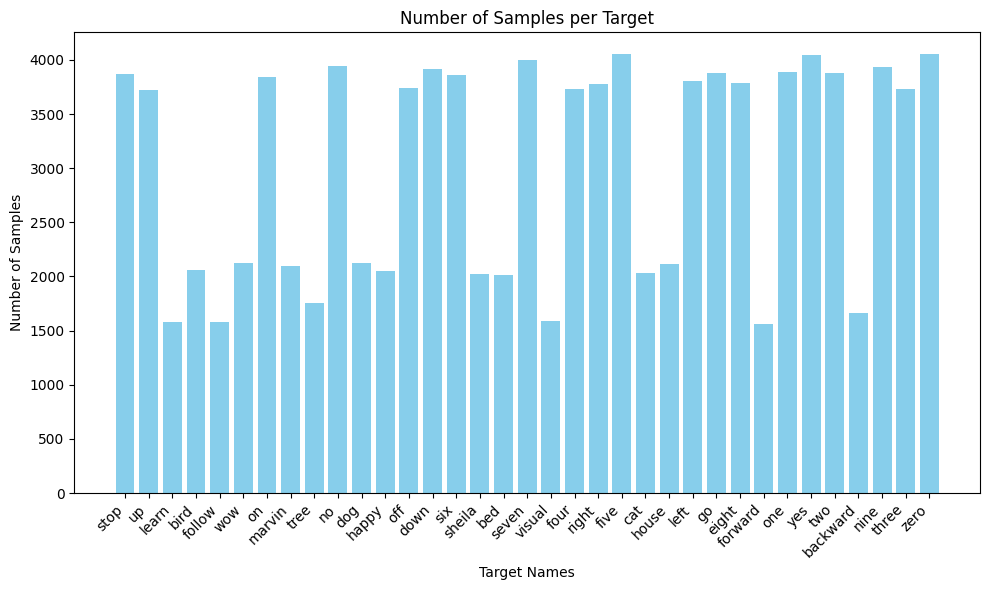

In [28]:
import os
import matplotlib.pyplot as plt
# Extract target names and their corresponding number of samples
target_names = list(num_samples_per_target.keys())
sample_counts = list(num_samples_per_target.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(target_names, sample_counts, color='skyblue')
plt.xlabel('Target Names')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Target')
plt.xticks(rotation=45, ha='right')  # Rotate target names by 45 degrees

# Show the graph
plt.tight_layout()
plt.show()

In [5]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [6]:
#filenames of every dataset
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/stop
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/up
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/learn
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/bird
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/follow
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/wow
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/on
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/marvin
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/tree
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/no
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/dog
/home/pmedur/strojnoUcenje/env/bin/

In [7]:
# Flattening filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [8]:
# Associating filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [9]:
# Calculating validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [10]:
# Breaking dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [11]:
# Breaking output apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [12]:
# Creating MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

Dropped: 9 (16, 10)
Dropped: 21 (16, 11)
Dropped: 24 (16, 14)
Dropped: 25 (16, 11)
Dropped: 29 (16, 11)
Dropped: 42 (16, 12)
Dropped: 57 (16, 10)
Dropped: 89 (16, 15)
Dropped: 106 (16, 13)
Dropped: 116 (16, 9)
Dropped: 124 (16, 7)
Dropped: 137 (16, 13)
Dropped: 165 (16, 15)
Dropped: 176 (16, 13)
Dropped: 200 (16, 13)
Dropped: 205 (16, 11)
Dropped: 212 (16, 8)
Dropped: 214 (16, 14)
Dropped: 219 (16, 8)
Dropped: 235 (16, 15)
Dropped: 238 (16, 11)
Dropped: 313 (16, 12)
Dropped: 338 (16, 8)
Dropped: 350 (16, 9)
Dropped: 419 (16, 13)
Dropped: 429 (16, 14)
Dropped: 443 (16, 14)
Dropped: 463 (16, 9)
Dropped: 486 (16, 11)
Dropped: 491 (16, 15)


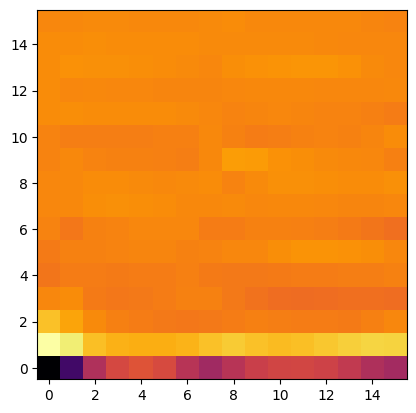

In [13]:
# testing set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

In [14]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.06


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


MFCCs: [[-7.95118079e+01 -6.57932257e+01 -4.39823755e+01 -3.12290938e+01
  -2.56220914e+01 -2.38923425e+01 -2.38272203e+01 -2.50399968e+01
  -2.96355946e+01 -3.83352477e+01 -5.11090993e+01 -6.37057251e+01
  -6.83067854e+01 -7.18484010e+01 -7.38828976e+01 -7.52872042e+01]
 [-5.57777867e+00  1.83127351e+00  1.21294768e+01  1.43092550e+01
   1.45681779e+01  1.44211787e+01  1.32255803e+01  1.17204674e+01
   1.09294034e+01  1.01750273e+01  7.97293585e+00  4.31639199e+00
   1.58033891e+00  5.62186462e-01  4.47126614e-01  6.30044490e-01]
 [ 3.66323369e+00  9.32882354e-02 -1.48995474e+00 -4.11880054e+00
  -5.21607705e+00 -5.65693909e+00 -5.39023672e+00 -3.58996568e+00
  -5.85929075e-01  2.29224496e+00  3.87403870e+00  1.24465499e+00
  -2.51969493e-01 -2.91326891e-01 -7.72435855e-01 -1.47406637e+00]
 [-5.20314892e+00 -8.56094480e+00 -3.19462044e+00 -1.78496690e+00
  -1.34777946e+00 -5.14304905e-01  1.15927694e+00  2.01458973e+00
   3.02680469e+00  4.17446928e+00  3.57091512e+00 -1.82062167e-01


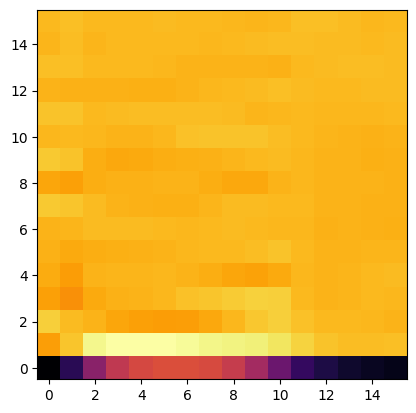

In [15]:
# testing MFCC
from playsound import playsound

idx = 267

path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

print(target_list[int(y_orig_train[idx])])
playsound(path)

In [16]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        if not path.endswith('.wav'):
            continue

        mfccs = calc_mfcc(path)

        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [17]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 9 (16, 10)
Dropped: 21 (16, 11)
Dropped: 24 (16, 14)
Dropped: 25 (16, 11)
Dropped: 29 (16, 11)
Dropped: 42 (16, 12)
Dropped: 57 (16, 10)
Dropped: 89 (16, 15)
Dropped: 106 (16, 13)
Dropped: 116 (16, 9)
Dropped: 124 (16, 7)
Dropped: 137 (16, 13)
Dropped: 165 (16, 15)
Dropped: 176 (16, 13)
Dropped: 200 (16, 13)
Dropped: 205 (16, 11)
Dropped: 212 (16, 8)
Dropped: 214 (16, 14)
Dropped: 219 (16, 8)
Dropped: 235 (16, 15)
Dropped: 238 (16, 11)
Dropped: 313 (16, 12)
Dropped: 338 (16, 8)
Dropped: 350 (16, 9)
Dropped: 419 (16, 13)
Dropped: 429 (16, 14)
Dropped: 443 (16, 14)
Dropped: 463 (16, 9)
Dropped: 486 (16, 11)
Dropped: 491 (16, 15)
Dropped: 518 (16, 12)
Dropped: 530 (16, 5)
Dropped: 543 (16, 7)
Dropped: 547 (16, 14)
Dropped: 562 (16, 14)
Dropped: 574 (16, 14)
Dropped: 576 (16, 14)
Dropped: 577 (16, 11)
Dropped: 578 (16, 7)
Dropped: 579 (16, 6)
Dropped: 588 (16, 14)
Dropped: 597 (16, 15)
Dropped: 603 (16, 7)
Dropped: 608 (16, 10)
Dropped: 647 (16, 7)
Dropped: 652 (16, 8)
Dropped: 65

In [18]:
# Save features 
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [19]:
# loading features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

New number of samples per target: {0.0: 3602, 1.0: 3323, 2.0: 1438, 3.0: 1793, 4.0: 1464, 5.0: 1847, 6.0: 3524, 7.0: 1886, 8.0: 1514, 9.0: 3600, 10.0: 1870, 11.0: 1811, 12.0: 3473, 13.0: 3628, 14.0: 3633, 15.0: 1801, 16.0: 1733, 17.0: 3714, 18.0: 1477, 19.0: 3460, 20.0: 3484, 21.0: 3779, 22.0: 1758, 23.0: 1874, 24.0: 3552, 25.0: 3528, 26.0: 3472, 27.0: 1462, 28.0: 3542, 29.0: 3745, 30.0: 3580, 31.0: 1568, 32.0: 3674, 33.0: 3454, 34.0: 3793}
Total samples after filtering: 96856


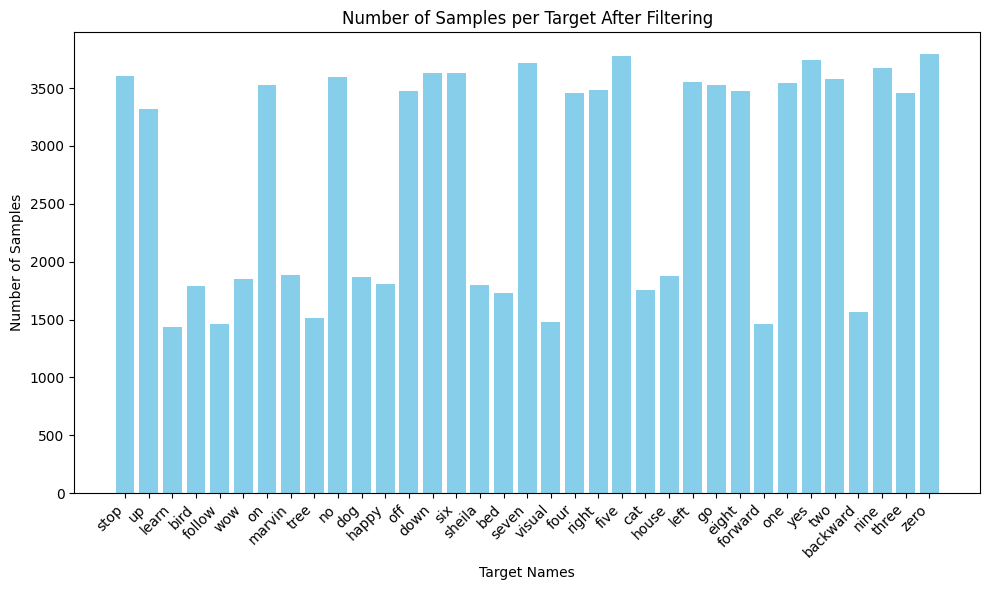

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed features from the .npz file
feature_sets_file = 'all_targets_mfcc_sets.npz'
feature_sets = np.load(feature_sets_file)

# Extract features and labels from the .npz file
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

# Combine all labels
all_labels = np.concatenate([y_train, y_val, y_test])

# Count the number of samples for each target
unique_targets, sample_counts = np.unique(all_labels, return_counts=True)
num_samples_per_target = dict(zip(unique_targets, sample_counts))

# Print the new number of samples per target
print('New number of samples per target:', num_samples_per_target)

# Calculate the total number of samples
total_samples = np.sum(sample_counts)
print('Total samples after filtering:', total_samples)

# Extract target names and their corresponding number of samples
#target_names = list(num_samples_per_target.keys())
sample_counts = list(num_samples_per_target.values())

# Create the updated bar graph
plt.figure(figsize=(10, 6))
plt.bar(target_names, sample_counts, color='skyblue')
plt.xlabel('Target Names')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Target After Filtering')
plt.xticks(rotation=45, ha='right')  # Rotate target names by 45 degrees

# Show the graph
plt.tight_layout()
plt.show()

Original total samples: 105829
New total samples: 96856
Old sample counts: {'stop': 3872, 'up': 3723, 'learn': 1575, 'bird': 2064, 'follow': 1579, 'wow': 2123, 'on': 3845, 'marvin': 2100, 'tree': 1759, 'no': 3941, 'dog': 2128, 'happy': 2054, 'off': 3745, 'down': 3917, 'six': 3860, 'sheila': 2022, 'bed': 2014, 'seven': 3998, 'visual': 1592, 'four': 3728, 'right': 3778, 'five': 4052, 'cat': 2031, 'house': 2113, 'left': 3801, 'go': 3880, 'eight': 3787, 'forward': 1557, 'one': 3890, 'yes': 4044, 'two': 3880, 'backward': 1664, 'nine': 3934, 'three': 3727, 'zero': 4052}
New sample counts: {'backward': 1568, 'bed': 1733, 'bird': 1793, 'cat': 1758, 'dog': 1870, 'down': 3628, 'eight': 3472, 'five': 3779, 'follow': 1464, 'forward': 1462, 'four': 3460, 'go': 3528, 'happy': 1811, 'house': 1874, 'learn': 1438, 'left': 3552, 'marvin': 1886, 'nine': 3674, 'no': 3600, 'off': 3473, 'on': 3524, 'one': 3542, 'right': 3484, 'seven': 3714, 'sheila': 1801, 'six': 3633, 'stop': 3602, 'three': 3454, 'tree': 1

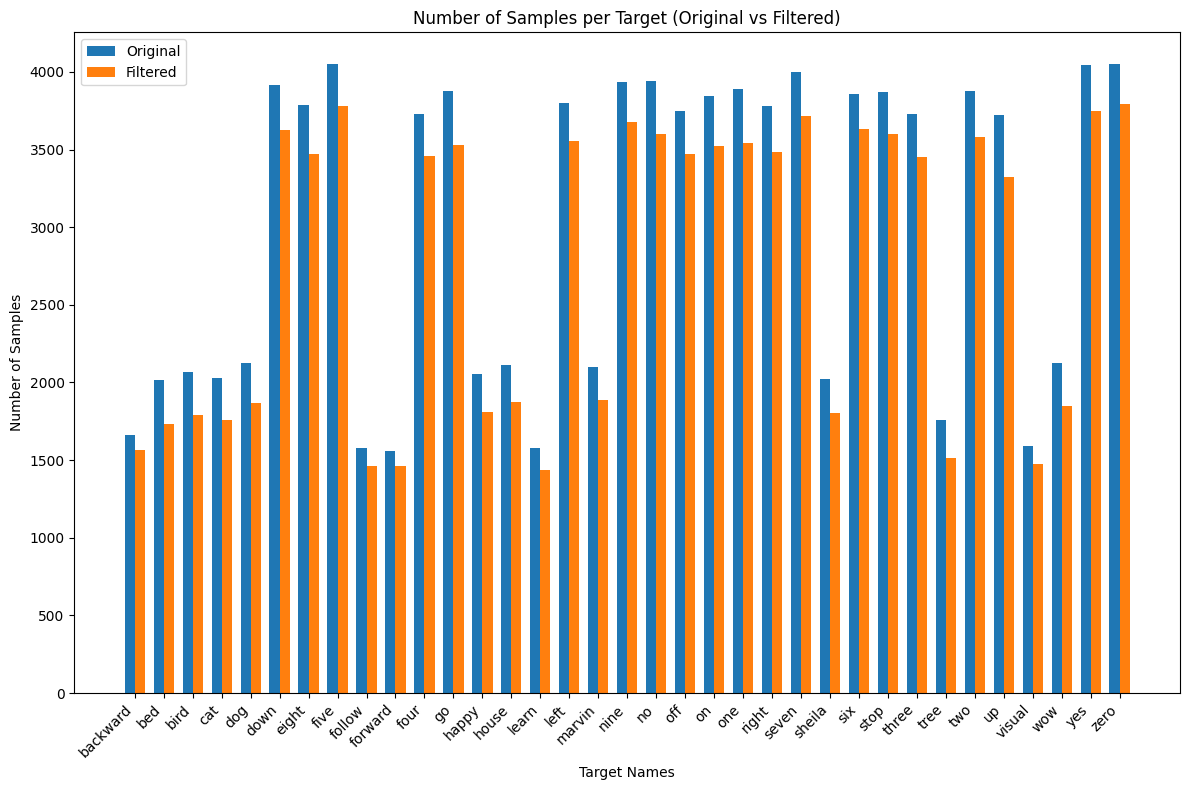

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to count the number of samples per target
def count_samples_per_target(dataset_path, targets):
    num_samples_per_target = {}
    total_samples = 0
    for target in targets:
        target_path = os.path.join(dataset_path, target)
        num_samples = len(os.listdir(target_path))
        num_samples_per_target[target] = num_samples
        total_samples += num_samples
    return num_samples_per_target, total_samples

# and the value at that index is the corresponding target name
target_mapping = ['stop', 'up', 'learn', 'bird', 'follow', 'wow', 'on',
                  'marvin', 'tree', 'no', 'dog', 'happy', 'off', 'down',
                  'six', 'sheila', 'bed', 'seven', 'visual', 'four', 'right',
                  'five', 'cat', 'house', 'left', 'go', 'eight', 'forward',
                  'one', 'yes', 'two', 'backward', 'nine', 'three', 'zero']

# Count original samples per target
num_samples_per_target_old, total_samples_old = count_samples_per_target(dataset_path, all_targets)
print('Original total samples:', total_samples_old)

# Load the processed features from the .npz file
feature_sets_file = 'all_targets_mfcc_sets.npz'  # Replace with your actual file path
feature_sets = np.load(feature_sets_file)

# Extract features and labels from the .npz file
y_train = feature_sets['y_train']
y_val = feature_sets['y_val']
y_test = feature_sets['y_test']

# Combine all labels
all_labels = np.concatenate([y_train, y_val, y_test])

# Convert labels to integers
all_labels = all_labels.astype(int)

# Assuming target_mapping is a list where the index represents the numeric label
# and the value at that index is the corresponding target name
target_mapping = all_targets  # Complete this list with all target names

# Map numeric labels to target names
all_labels_mapped = [target_mapping[label] for label in all_labels]

# Count the number of samples for each target after filtering
unique_targets, sample_counts = np.unique(all_labels_mapped, return_counts=True)
num_samples_per_target_new = dict(zip(unique_targets, sample_counts))
print('New total samples:', np.sum(sample_counts))

# Ensure both dictionaries have the same keys
for target in all_targets:
    if target not in num_samples_per_target_new:
        num_samples_per_target_new[target] = 0
    if target not in num_samples_per_target_old:
        num_samples_per_target_old[target] = 0

# Debug: Print the target names and counts
print("Old sample counts:", num_samples_per_target_old)
print("New sample counts:", num_samples_per_target_new)

# Extract target names and their corresponding number of samples
target_names = sorted(list(num_samples_per_target_old.keys()))
old_sample_counts = [num_samples_per_target_old[target] for target in target_names]
new_sample_counts = [num_samples_per_target_new[target] for target in target_names]

# Create the grouped bar graph
bar_width = 0.35
index = np.arange(len(target_names))

plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, old_sample_counts, bar_width, label='Original')
bar2 = plt.bar(index + bar_width, new_sample_counts, bar_width, label='Filtered')

plt.xlabel('Target Names')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Target (Original vs Filtered)')
plt.xticks(index + bar_width / 2, target_names, rotation=45, ha='right')
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()